# COMP5318 - Machine Learning and Data Mining 

## Random Forest

#### 10 fold cross validation

 1 Load data

In [15]:
import numpy as np
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

2 Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_test)
X_test = scaler.transform(X_test)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


3 RF

3.1 Define RF function

In [17]:
from sklearn.ensemble import RandomForestClassifier
def RF_parallel(X_train,y_train,X_val,y_val):
    
    # define RF parameters
    best_rf_clf = RandomForestClassifier(criterion='entropy',max_depth=30,n_estimators=140,random_state=666)
    
    best_rf_clf.fit(X_train, y_train) # train DT model

    return [y_val,best_rf_clf.predict(X_val)] # return [true label, predicted label]

3.2 10-fold CV with parallel processing

In [18]:
%%time
from joblib import Parallel, delayed
import multiprocessing
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=666) # split data into 10 pairs of training set and validation set
 
num_cores = multiprocessing.cpu_count() # count available CPU
    
# parallel processing for 10-fold CV with all CPU working in parallel
result=Parallel(n_jobs=num_cores)(delayed(RF_parallel)(X_train[train],y_train[train],X_train[test],y_train[test] ) for train, test in kf.split(X_train))
# Wall time: 5min 44s

Wall time: 5min 44s


4 Evaluation

4.1 classification_report

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
tmp=np.hstack(np.asarray(result)) # stack all results from parallel processing

print(classification_report(tmp[0], tmp[1]))
print(accuracy_score(tmp[0], tmp[1])) # 0.8850333333333333

#              precision    recall  f1-score   support

#           0       0.82      0.88      0.85      6000
#           1       0.99      0.97      0.98      6000
#           2       0.79      0.82      0.80      6000
#           3       0.88      0.92      0.90      6000
#           4       0.78      0.84      0.81      6000
#           5       0.97      0.95      0.96      6000
#           6       0.76      0.60      0.67      6000
#           7       0.94      0.95      0.94      6000
#           8       0.96      0.97      0.97      6000
#           9       0.95      0.95      0.95      6000

# avg / total       0.88      0.89      0.88     60000

             precision    recall  f1-score   support

          0       0.82      0.88      0.85      6000
          1       0.99      0.97      0.98      6000
          2       0.79      0.82      0.80      6000
          3       0.88      0.92      0.90      6000
          4       0.78      0.84      0.81      6000
          5       0.97      0.95      0.96      6000
          6       0.76      0.60      0.67      6000
          7       0.94      0.95      0.94      6000
          8       0.96      0.97      0.97      6000
          9       0.95      0.95      0.95      6000

avg / total       0.88      0.89      0.88     60000

0.8850333333333333


In [21]:
from sklearn.metrics import confusion_matrix

cm_dt=confusion_matrix(tmp[0], tmp[1])
cm_dt

# array([[5254,    2,   82,  176,   20,    5,  409,    0,   52,    0],
#        [  15, 5799,   22,  129,    8,    2,   23,    0,    2,    0],
#        [  41,    2, 4903,   58,  672,    0,  292,    0,   32,    0],
#        [ 116,   16,   43, 5520,  185,    0,  111,    0,    9,    0],
#        [   9,    5,  436,  205, 5068,    1,  253,    0,   22,    1],
#        [   0,    1,    0,    1,    0, 5719,    0,  182,   25,   72],
#        [ 951,    6,  697,  148,  506,    2, 3605,    0,   85,    0],
#        [   0,    0,    0,    0,    0,   77,    0, 5676,   11,  236],
#        [   7,    3,   28,   22,   26,   18,   51,   11, 5828,    6],
#        [   0,    0,    1,    1,    1,   61,    2,  196,    8, 5730]],
#       dtype=int64)

array([[5254,    2,   82,  176,   20,    5,  409,    0,   52,    0],
       [  15, 5799,   22,  129,    8,    2,   23,    0,    2,    0],
       [  41,    2, 4903,   58,  672,    0,  292,    0,   32,    0],
       [ 116,   16,   43, 5520,  185,    0,  111,    0,    9,    0],
       [   9,    5,  436,  205, 5068,    1,  253,    0,   22,    1],
       [   0,    1,    0,    1,    0, 5719,    0,  182,   25,   72],
       [ 951,    6,  697,  148,  506,    2, 3605,    0,   85,    0],
       [   0,    0,    0,    0,    0,   77,    0, 5676,   11,  236],
       [   7,    3,   28,   22,   26,   18,   51,   11, 5828,    6],
       [   0,    0,    1,    1,    1,   61,    2,  196,    8, 5730]],
      dtype=int64)

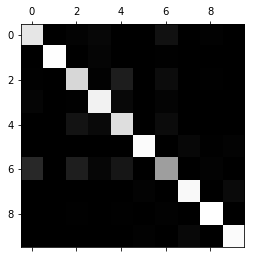

In [23]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(cm_dt, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter


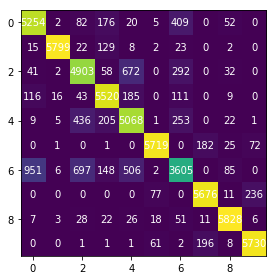

In [24]:
#another way to visulize
fig, ax = plt.subplots()
im = ax.imshow(cm_dt)
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, cm_dt[i][j], ha='center', va='center', color='w')
fig.tight_layout()
plt.show()

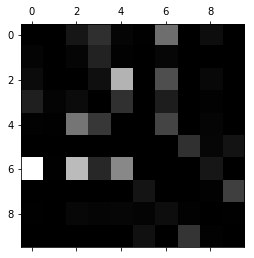

In [25]:
error_matrix = cm_dt / np.sum(cm_dt, axis=1)
np.fill_diagonal(error_matrix, 0)
#error_matrix: the bigger value means more wrong predictions
# visualization
import matplotlib.pyplot as plt
plt.matshow(error_matrix, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter